# Propagations analysis

In [2]:
import ast
import pickle
import pathlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm

In [3]:
# dalla sim19 è statistica per la tabella che riproduce i dati di digg

In [4]:
file_info = '/Users/Cinus/University/Tesi/womg_git/Code/Library2.0/Output/Network_info_sim50.txt'
file_prop = '/Users/Cinus/University/Tesi/womg_git/Code/Library2.0/Output/Diffusion_formatted_output_sim50.txt'

In [5]:
def extract(file_in):
    if str(pathlib.Path(file_in).suffix) == '.txt':
        with open(file_in, 'r') as f:
            s = f.readlines()
    if str(pathlib.Path(file_in).suffix) == '.pickle':
        with open(file_in, 'rb') as f:
            s = pickle.load(f)
    return s

In [6]:
extract(file_info)

["{'type': 'DiGraph', 'numb_nodes': '15580', 'numb_edges': '199860', 'aver_degree': 'degree:', 'directed': 'Average'}"]

In [7]:
prop = extract(file_prop)

In [8]:
def to_dict(prop):
    '''
    out-first key time, inner-second key item, value: new active nodes
    '''
    prop_dict = {}
    index = 0
    for i in range(2, len(prop), 2):
        prop[i] = prop[i].replace('\n', '')
        prop[i] = prop[i].replace('set()','None')
        prop_dict[index] = ast.literal_eval(prop[i])
        index += 1
    return prop_dict

In [9]:
cascades = to_dict(prop)

## Statistcs

In [10]:
# actions
def items_actions(cascades, plot=True):
    numb_docs = max(cascades[0].keys())
    items_action_vec = [0 for i in range(numb_docs+1)]
    for step in cascades.keys():
        for item in cascades[step].keys():
            if cascades[step][item] != None:
                items_action_vec[item] += len(cascades[step][item])
            #if cascades[step][item] == None:
                #print(item)
    #print(items_action_vec)
    if plot:
        plt.hist(items_action_vec)
        plt.show()
    
    print('items: ',int(max(items_action_vec)), int(min(items_action_vec)), int(np.mean(items_action_vec)))
    return items_action_vec

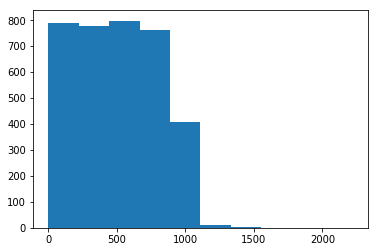

items:  2220 0 504


In [11]:
items_data = items_actions(cascades)

In [12]:
lista = []
for i in range(len(items_data)):
    if items_data[i]<500:
        lista.append(i)
print(len(lista))

1759


In [13]:
def users_actions(cascades, nodes=15580):
    if nodes:
        numb_nodes = nodes
    else:
        numb_nodes = int(extract(file_info)['numb_nodes'])
        
    # defining dict
    users_actions_dict = {}
    for step in cascades.keys():
        for item in cascades[step].keys():
            if cascades[step][item] != None:
                for node in cascades[step][item]:
                    users_actions_dict[node] = 0
                    
    # counting            
    for step in cascades.keys():
        for item in cascades[step].keys():
            if cascades[step][item] != None:
                for node in cascades[step][item]:
                    users_actions_dict[node] += 1
                    
    users_actions_vec = [0 for i in range(numb_nodes)]
    for key, index in zip(sorted(users_actions_dict.keys()), range(numb_nodes)):
        users_actions_vec[index] = users_actions_dict[key]
    
    print('users: ',int(max(users_actions_vec)), int(min(users_actions_vec)), int(np.mean(users_actions_vec)))
    return users_actions_vec

In [14]:
users_data = users_actions(cascades)

users:  169 77 114


In [15]:
def items_lifetime(cascades):
    numb_docs = max(cascades[0].keys())
    items_lifetime_vec = [0 for i in range(numb_docs+1)]
    for step in cascades.keys():
        for item in cascades[step].keys():
            if cascades[step][item] != None:
                items_lifetime_vec[item] += 1
    return int(np.mean(items_lifetime_vec))

In [16]:
items_lifetime(cascades)

1

## statistics

Paper: nodes=16000, items=3500, actions=1milion, 

avg_act_user=71, min_act_user=6, max_act_user=2600
avg_act_item=326, min_act_item=90, max_act_item=5000


Sim0: nodes=16000, items=1000, actions=,
avg_act_user=71, min_act_user=6, max_act_user=2600
avg_act_item=326, min_act_item=90, max_act_item=5000

Sim1: nodes=16000, items=1000, actions=,
avg_act_user=71, min_act_user=6, max_act_user=2600
avg_act_item=326, min_act_item=90, max_act_item=5000

Sim2: nodes=16000, items=1000, actions=,
avg_act_user=71, min_act_user=6, max_act_user=2600
avg_act_item=326, min_act_item=90, max_act_item=5000

Sim3: nodes=15580, items=1000, actions=, --steps 500 --actives 0.5 --virality 2
avg_act_user=30, min_act_user=8, max_act_user=851
avg_act_item=2283, min_act_item=0, max_act_item=3610


In [30]:
### virality plot

'''
file_idx = [0, 1, 2, 3, 4, 5, 6, 7, 8]
viralities = [2, 1, 0.5, 0.3, 0.5, 0.35, 0.25, 0.2, 0.1]
'''
'''

file_idx = [0, 2, 6,  16]
viralities = [2, 0.5, 0.35,  0.11]
'''
path = '/Users/Cinus/University/Tesi/womg_git/Code/Library2.0/Output/Diffusion_formatted_output_sim'


file_idx = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
viralities = [0.5, 0.45, 0.4, 0.38, 0.35, 0.32, 0.3, 0.28, 0.25, 0.22, 0.2, 0.18, 0.15, 0.12]

y_item = []
x_item = []
y_user = []
x_user = []
cdf_data = {}
cdf_data['item'] = {}
cdf_data['user'] = {}
for i in tqdm(range(len(file_idx))):
    # data for cdf plot
    cdf_data['item'][i] = []
    cdf_data['user'][i] = []
    ########################
    file = path + str(file_idx[i]) + '.txt'
    prop = extract(file)
    cascades = to_dict(prop)
    items_data = items_actions(cascades, plot=False)
    users_data = users_actions(cascades)
    for n in range(len(items_data)):
        cdf_data['item'][i].append(items_data[n])
        y_item.append(items_data[n])
        x_item.append(viralities[i])
    for n in range(len(users_data)):
        cdf_data['user'][i].append(users_data[n])
        y_user.append(users_data[n])
        x_user.append(viralities[i])

  0%|          | 0/14 [00:00<?, ?it/s]

items:  3567 0 1396


  7%|▋         | 1/14 [00:30<06:40, 30.78s/it]

users:  1939 56 97
items:  3621 0 1277


 14%|█▍        | 2/14 [00:59<06:01, 30.15s/it]

users:  1803 53 97
items:  3551 0 1144


 21%|██▏       | 3/14 [01:26<05:20, 29.09s/it]

users:  1556 58 96
items:  3579 0 1125


 29%|██▊       | 4/14 [01:51<04:38, 27.88s/it]

users:  1560 51 95
items:  3557 0 1037


 36%|███▌      | 5/14 [02:14<03:59, 26.63s/it]

users:  1403 52 96
items:  3610 0 1007


 43%|████▎     | 6/14 [02:38<03:25, 25.63s/it]

users:  1425 52 94
items:  3552 0 943


 50%|█████     | 7/14 [03:00<02:51, 24.51s/it]

users:  1290 56 95
items:  3587 0 917


 57%|█████▋    | 8/14 [03:20<02:20, 23.41s/it]

users:  1238 55 95
items:  3565 0 885


 64%|██████▍   | 9/14 [03:40<01:51, 22.32s/it]

users:  1221 57 94
items:  3559 0 740


 71%|███████▏  | 10/14 [03:57<01:23, 20.80s/it]

users:  992 51 91
items:  3509 0 684


 79%|███████▊  | 11/14 [04:14<00:58, 19.67s/it]

users:  826 56 93
items:  3674 0 619


 86%|████████▌ | 12/14 [04:29<00:36, 18.20s/it]

users:  715 56 93
items:  3577 0 589


 93%|█████████▎| 13/14 [04:43<00:16, 16.87s/it]

users:  692 54 90
items:  3530 1 542


100%|██████████| 14/14 [04:56<00:00, 15.76s/it]

users:  599 56 90


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


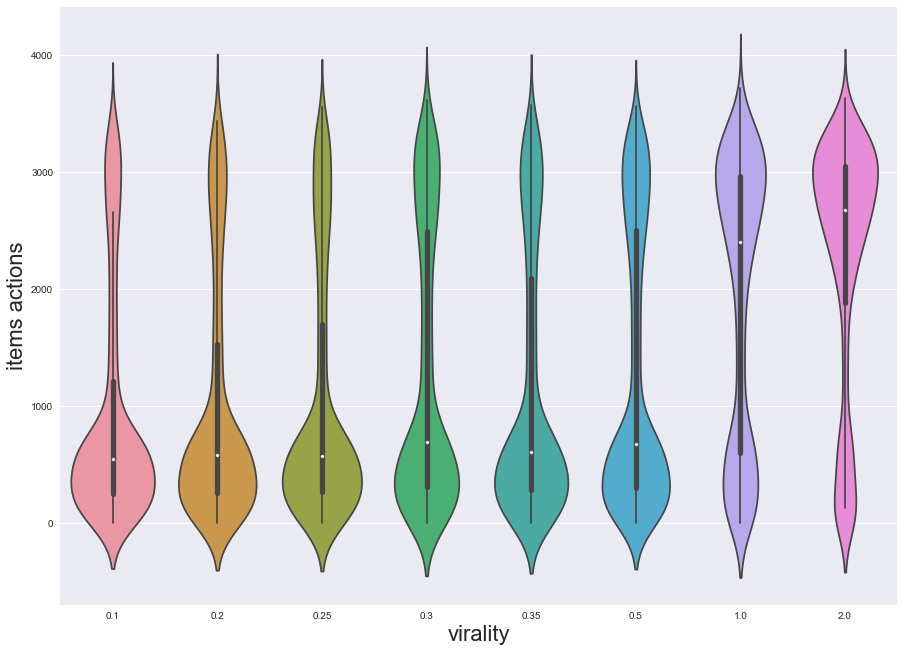

In [24]:
fig = plt.figure(figsize=(15,11))

plt.xlabel('virality', fontsize=22)
plt.ylabel('items actions', fontsize=22)

ax = sns.violinplot(x=x_item, y=y_item)
sns.set()
plt.show()


fig.savefig('/Users/Cinus/University/Tesi/Tesi/Images/violin_pres.pdf')

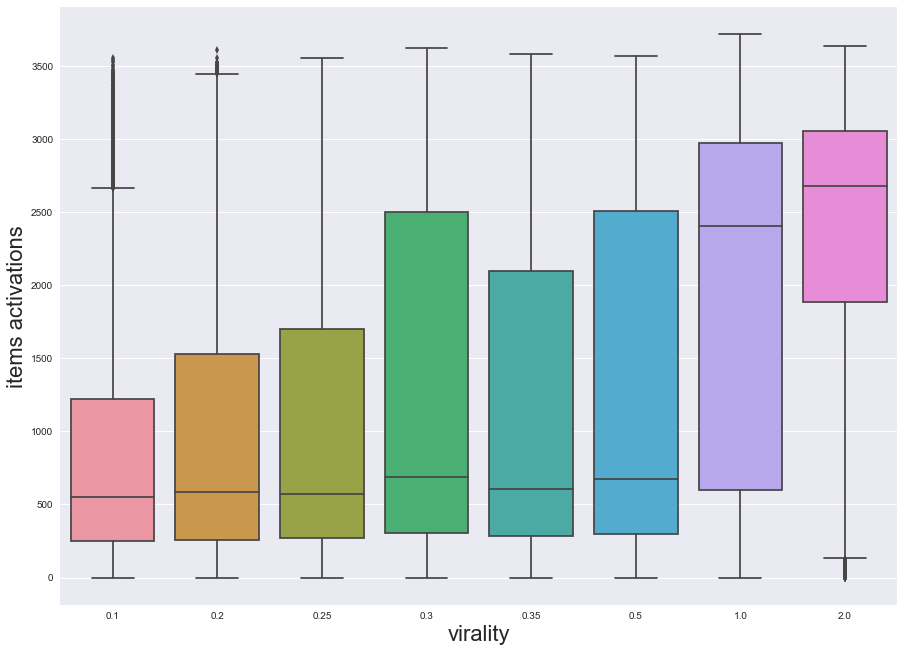

In [25]:
fig = plt.figure(figsize=(15,11))

plt.xlabel('virality', fontsize=22)
plt.ylabel('items activations', fontsize=22)

ax = sns.boxplot(x=x_item, y=y_item)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


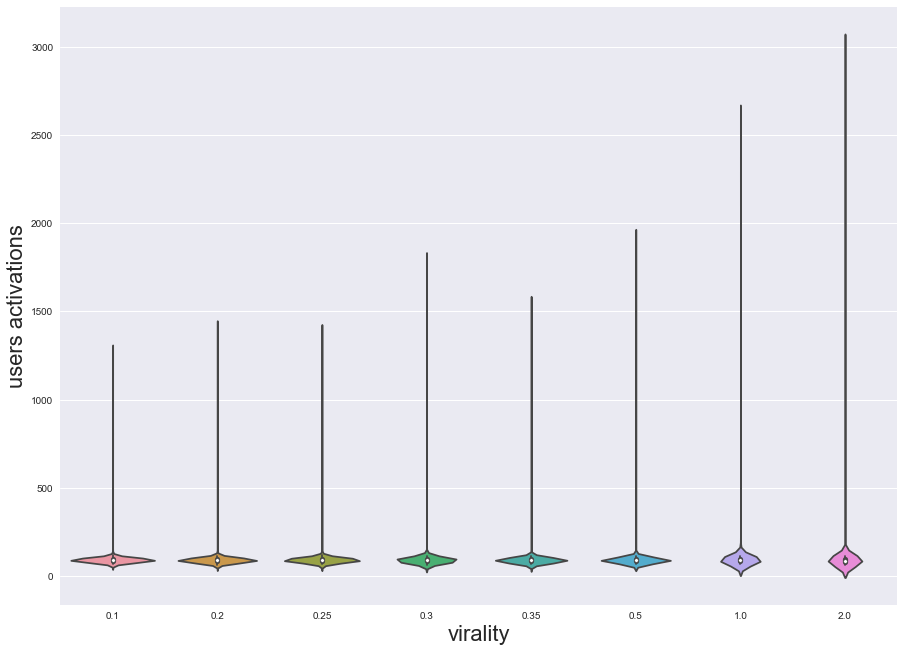

In [26]:
fig = plt.figure(figsize=(15,11))

plt.xlabel('virality', fontsize=22)
plt.ylabel('users activations', fontsize=22)

ax = sns.violinplot(x=x_user, y=y_user)
plt.show()

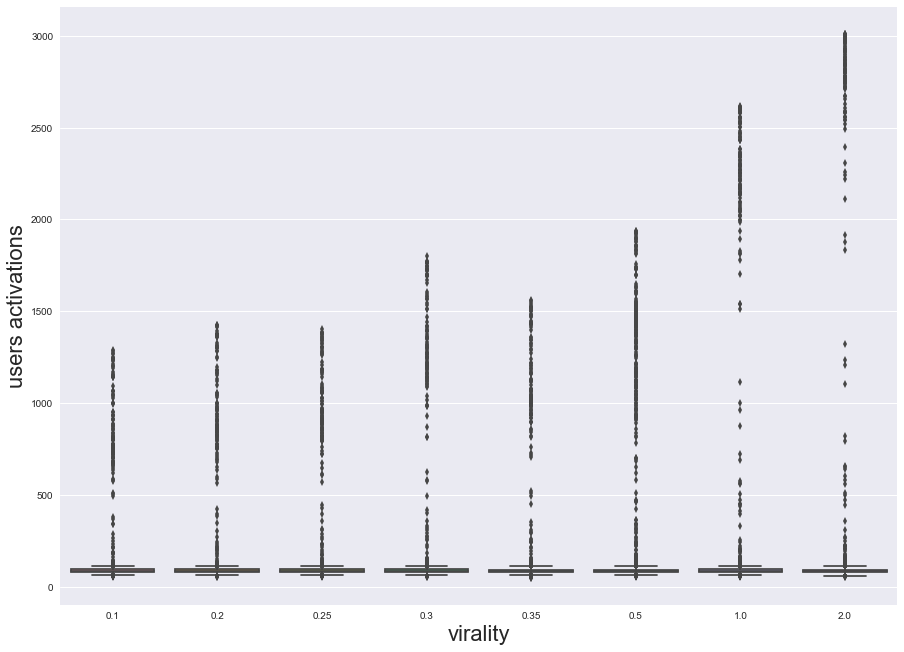

In [27]:
fig = plt.figure(figsize=(15,11))

plt.xlabel('virality', fontsize=22)
plt.ylabel('users activations', fontsize=22)

ax = sns.boxplot(x=x_user, y=y_user)
plt.show()

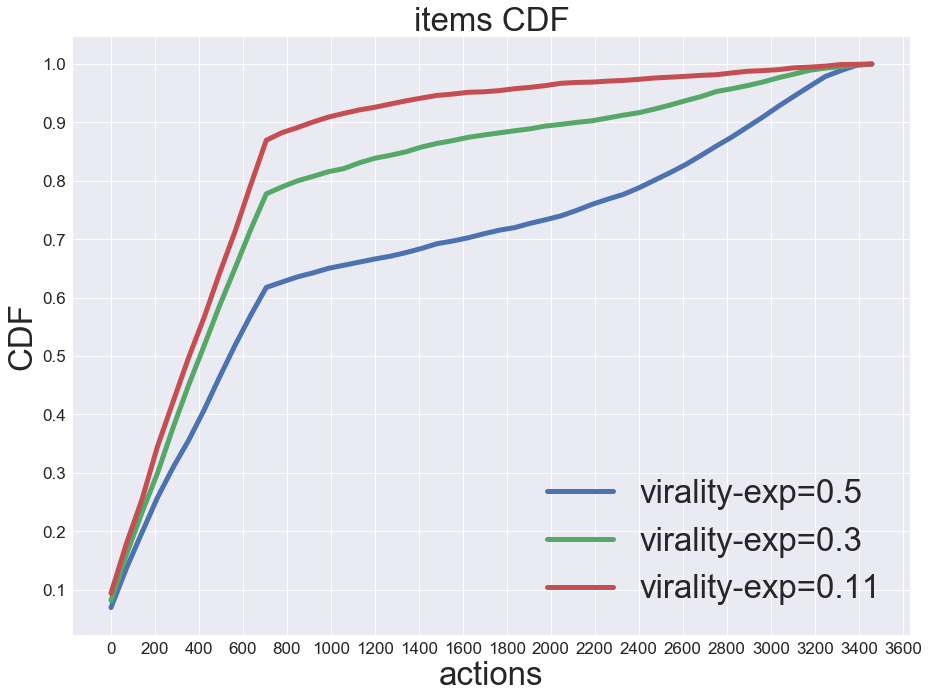

In [48]:
fig = plt.figure(figsize=(15,11))


file_idx = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
viralities = [0.5, 0.45, 0.4, 0.38, 0.35, 0.32, 0.3, 0.28, 0.25, 0.22, 0.2, 0.18, 0.15, 0.12]


cdf_hist = {}
cdf_hist['user'] = {}
cdf_hist['item'] = {}
for i in [2, 9, 13]:
    # evaluate the histogram
    cumulative = []
    values, base = np.histogram(cdf_data['item'][i], bins=50)
    cdf_hist['item'][i] = (values, base)
    
for i in [2, 9, 13]:
    #evaluate the cumulative
    cumulative = np.cumsum(cdf_hist['item'][i][0])/3553
    # plot the cumulative function
    plt.plot(base[:-1], cumulative, linewidth=5)
    #print(cumulative)
    plt.xlabel('actions', fontsize=33)
    plt.ylabel('CDF', fontsize=33)
    plt.tick_params(labelsize=17)
    #plt.yscale('log')
    #plt.xscale('log')
    plt.locator_params(axis='y', nbins=20)
    plt.locator_params(axis='x', nbins=20)
    plt.title('items CDF', fontsize=33)
    plt.legend(['virality-exp=0.5', 'virality-exp=0.3', 'virality-exp=0.11', 'virality-exp=0.45', 'virality-exp=0.45'], 
               fontsize=33)
plt.show()
#fig.savefig('/Users/Cinus/University/Tesi/Tesi/Images/cdf_items.pdf')
fig.savefig('/Users/Cinus/University/Tesi/Presentazioni/Tesi_Template/Downloads/cdf_items.pdf')

In [ ]:
fig = plt.figure(figsize=(15,11))


file_idx = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
viralities = [0.5, 0.45, 0.4, 0.38, 0.35, 0.32, 0.3, 0.28, 0.25, 0.22, 0.2, 0.18, 0.15, 0.12]


cdf_hist = {}
cdf_hist['user'] = {}
cdf_hist['item'] = {}
for i in [14, 15]:
    # evaluate the histogram
    cumulative = []
    values, base = np.histogram(cdf_data['user'][i], bins=20)
    cdf_hist['user'][i] = (values, base)
    
for i in [14, 15]:
    #evaluate the cumulative
    cumulative = np.cumsum(cdf_hist['user'][i][0])/15580
    # plot the cumulative function
    plt.plot(base[:-1], cumulative, )
    #print(cumulative)
    plt.xlabel('actions', fontsize=22)
    plt.ylabel('CDF', fontsize=22)
    #plt.yscale('log')
    #plt.xscale('log')
    #plt.locator_params(axis='y', nbins=20)
    plt.locator_params(axis='x', nbins=30 )
    plt.title('users CDF', fontsize=33)
    plt.legend(['virality-exp=2', 'virality-exp=1', 'virality-exp=0.5', 'virality-exp=0.45', 'virality-exp=0.45'], fontsize=22)
plt.show()
fig.savefig('/Users/Cinus/University/Tesi/Tesi/Images/cdf_users.pdf')

In [ ]:
cumulative

In [ ]:
cumulative

In [ ]:
import random

samples = []
gamma = 0.009
for i in range(3):
    samples.append(np.float_power(random.random(), -gamma))

In [ ]:
samples

In [ ]:
samples

In [ ]:
a=[range(3)]

In [ ]:
a